In [1]:
#when we have same probability or chances to have something , we 
#reduce k until we find a unique winner

In [9]:
def majority_vote(labels:List[str]) -> str:
    """assume that labels are ordered from nearest to farthest"""
    vote_counts=Counter(labels)
    winner,winner_count=vote_counts.most_common(1)[0]
    num_winners=len([count for count in vote_counts.values()
                    if count==winner_count])
    if num_winners==1:
        return winner
    else:
        return majority_vot(labels[:-1]) 
assert majority_vote(['a','b','c','b','a'])=='b'

NameError: name 'majority_vot' is not defined

In [10]:
# correction
from typing import List
from collections import Counter

def majority_vote(labels: List[str]) -> str:
    """
    Returns the label with the majority vote.
    If there is a tie, removes the farthest label (last one)
    and retries — suitable for KNN where labels are ordered
    nearest → farthest.
    """
    
    # Count frequency of each label
     vote_counts = Counter(labels)
#vote_counts	A Counter dictionary storing each label and its count
#.most_common(1)	Returns a list of the top 1 most frequent elements
#[0]	Extracts the first (and only) item from that list
#winner, winner_count = ...	Unpacks the tuple into 2 variables

    
    
    # Most common label and its count
    winner, winner_count = vote_counts.most_common(1)[0]

#vote_counts is a Counter that stores how many times each label appears.
#most_common(1) gets a list of the top 1 most frequent label.
#[0] picks that only result.
# result is a tuple like:   


    # Count how many labels have the same highest count
    num_winners = len([count for count in vote_counts.values()
                       if count == winner_count])
    
    # ✅ If unique winner → return it
    if num_winners == 1:
        return winner
    else:
        # ❌ Tie → remove the farthest label and try again
        return majority_vote(labels[:-1])

# ✅ Test case
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'
print(majority_vote(['a', 'b', 'c', 'b', 'a']))


IndentationError: unexpected indent (3853547874.py, line 14)

In [ ]:
### function to create classifier 
from typing import NamedTuple
from scratch.linear_algebra imoprt Vector, distance

class LabelPoint(NamedTuple): #This defines a type where point → numerical coordinates and label → category
    point:Vector
    label:str

#Predict the label for new_point based on its nearest neighbors.
def knn_classify(k:int, labeled_points:List[labeledPoint], 
                new_point:Vector) -> str:
    by_distance=sorted(labeled_points,           #Sorts all labeled points by distance to the new_point
                      key=lambda lp:distance(lp.point,new_point)) #distance() probably calculates Euclidean distance
    k_nearest_lables=[lp.label for lp in by_distance[:k]]    #Select the top k nearest neighbors #Extract only their labels

    return majority_vote(k_nearest_labels)        #Predict the class using majority voting among k neighbors

In [12]:
# usage of above function
# example : the iris dataset 
# datset:archive.ics.uci.edu/ml/datasets/iris

import requests
data=requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data") #Downloads the famous Iris dataset from UCI Machine Learning Repository
with open('iris.dat','w') as f: #Creates a file named iris.dat #Writes the downloaded data into it #Stored locally for ML processing later
    f.write(data.text) #data.text contains CSV-like content:




#NamedTuple ✅ → Used to create a lightweight data structure like a tuple but with named fields.


In [13]:
# to see the output of code
lines = data.text.splitlines()  # split into rows
print("Total rows in dataset:", len(lines))
print("\nFirst 10 rows:\n")
for row in lines[:10]:
    print(row)
# usage of above code : for Machine Learning dataset preparation.

Total rows in dataset: 151

First 10 rows:

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
# load and exlore data 
from typing import dict
import csv
from collections import defaultdict

def parse_iris_row(row:List[str])  -> LabeledPoint:
    measurements=[float(value) for value in row[:-1]] 
    label=row[-1].split("-")[-1]
    return LabeledPoint(measurement,label)

with open('iris.data') as f:
    reader=csv.reader(f)
    iris_data=[parse_iris_row(row) for  row in reader]

point_by_species:Dict[str, List[Vector]] = default(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

ImportError: cannot import name 'dict' from 'typing' (C:\Users\E-LIBRARY-04\anaconda3\Lib\typing.py)

In [15]:
# correction

from typing import List, Dict
import csv
from collections import defaultdict
from typing import NamedTuple

# Creating LabeledPoint structure
class LabeledPoint(NamedTuple): #NamedTuple makes a fixed structure
    point: List[float]
    label: str

# Function to parse Iris dataset rows
def parse_iris_row(row: List[str]) -> LabeledPoint:
    measurements = [float(value) for value in row[:-1]]  # Convert features to float
    label = row[-1].split("-")[-1]  # Extract species name
    return LabeledPoint(measurements, label)
    
#row: List[str] Input row from CSV is initially strings
#row[:-1]All columns except last = numeric features
#float(value)Convert string to number
#row[-1]Last column is species name
#.split("-")[-1]Extract actual name (Iris-setosa → setosa)
#return ...Create a LabeledPoint object




# Reading dataset file
iris_data = []  #Opens file you downloaded earlier  #Convert every line into a LabeledPoint   #if row avoids empty rows
with open('iris.dat') as f:
    reader = csv.reader(f)
    iris_data = [parse_iris_row(row) for row in reader if row]  # avoid blank rows

# Organizing data by species
points_by_species: Dict[str, List[List[float]]] = defaultdict(list) #Map: species → list of flower feature vector
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

#defaultdict(list)Creates an empty list automatically when a new label appears
#.append(iris.point)Adds measurement vector under the correct species


print("✅ Loaded Iris dataset")
print("Species and counts:")
for species, points in points_by_species.items():
    print(f"{species}: {len(points)} samples")


✅ Loaded Iris dataset
Species and counts:
setosa: 50 samples
versicolor: 50 samples
virginica: 50 samples


In [16]:
#plotting above 4dimensional code 
from matplotlib import pyplot as plt
metrics=['sepal length','sepal width','petal width','petal length','petal width']
pairs= [(i,j) for i in range(4) for j in range(4) if i <j]
marks=['+','.','x']
fig, ax=plt.subplots(2,3)
for row in range(2)
    for col in range(3):
        i,j=pairs[3*row+col]
        ax[row][col].set_little(f"{metrics[i]} vs {metrics[j]}",fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        for mark ,(species ,points) in zip(marks,points_by_species.items()):
            xs=[point[i] for point in points]
            xs=[point[j] for point in points]
            ax[row][col].scatter(xs,ys,marker=mark,label=species)
    ax[-1][-1].legend(loc='lower right',prop={'size':6})
plt.show()

SyntaxError: expected ':' (4094713082.py, line 7)

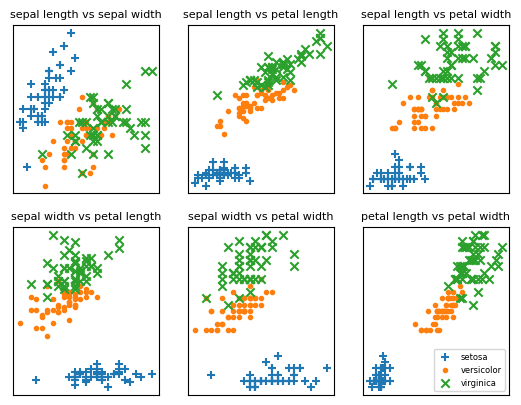

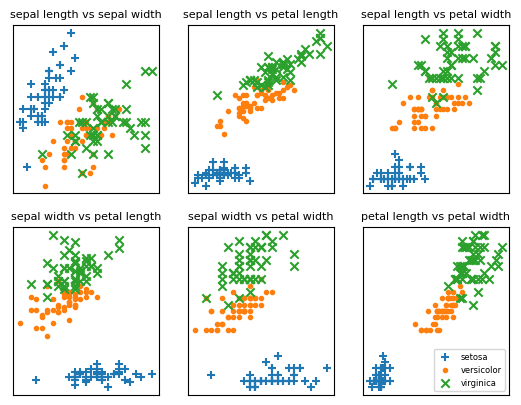

In [20]:
# correction
from matplotlib import pyplot as plt

metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']  #from matplotlib import pyplot as plt
pairs = [(i, j) for i in range(4) for j in range(4) if i < j] ## Creating all unique feature pairs for scatter plots
marks = ['+', '.', 'x'] ## Marker symbols for each of the 3 Iris species

fig, ax = plt.subplots(2, 3) ## Create a figure with 2 rows and 3 columns of subplots: total 6 plots

for row in range(2): ## Loop through each subplot position
    for col in range(3):
        i, j = pairs[3 * row + col] ## Select the correct pair of features for the subplot
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8) #        # Set subplot title showing which two features are plotted
         # Remove tick values for cleaner visualization
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        
        # Plot data species-wise

        for mark, (species, points) in zip(marks, 
                                        points_by_species.items()):
            xs = [point[i] for point in points]  # x-axis values (feature i)

            ys = [point[j] for point in points] ## y-axis values (feature j)
            ax[row][col].scatter(xs, ys, marker=mark, label=species)  ## Scatter plot points for that species with unique marker

ax[-1][-1].legend(loc='lower right', prop={'size': 6}) ## Add species legend only on the last subplot
plt.show()
pairs = [(i, j) for i in range(4) for j in range(4) if i < j] 
marks = ['+', '.', 'x']

fig, ax = plt.subplots(2, 3)

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

        for mark, (species, points) in zip(marks, 
                                        points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)

ax[-1][-1].legend(loc='lower right', prop={'size': 6})
plt.show()